In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
pip install pymongo

In [27]:
from pymongo import MongoClient

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\arulkumar\Desktop\MLGuvi\Airbnb_Analysis\airbnb.csv")
data.head()

,Unnamed: 0,accommodates,country,area,city,availability_365,bathrooms,bedrooms,cancellation_policy,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,room_type,coordinates,review_date,host_name,number_of_reviews
0,0,6,Turkey,Kadikoy,Istanbul,362,1.0,2.0,flexible,211.000000,211,1,2,527,100.0,Entire home/apt,"[29.03133,40.98585]",4.0,Zeynep,1
1,1,3,Turkey,Fatih,Istanbul,365,1.0,1.0,moderate,94.074801,0,1,1,121,92.0,Private room,"[28.98009,41.0062]",5.0,Mehmet Emin,29
2,2,1,United States,Bushwick,New York,0,1.5,1.0,flexible,94.074801,0,1,14,40,100.0,Private room,"[-73.93615,40.69791]",1.0,Josh,1
3,3,8,Brazil,Catete,Rio De Janeiro,296,4.0,1.0,strict_14_with_grace_period,0.000000,40,4,2,250,80.0,Private room,"[-43.18015675229857,-22.92638234778768]",2.0,Beatriz,1
4,4,2,United States,Upper West Side,New York,93,1.0,1.0,strict_14_with_grace_period,135.000000,0,1,12,135,94.0,Private room,"[-73.96523,40.79962]",4.0,Greta,70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4163 non-null   int64  
 1   accommodates         4163 non-null   int64  
 2   country              4163 non-null   object 
 3   area                 4163 non-null   object 
 4   city                 4163 non-null   object 
 5   availability_365     4163 non-null   int64  
 6   bathrooms            4163 non-null   float64
 7   bedrooms             4163 non-null   float64
 8   cancellation_policy  4163 non-null   object 
 9   cleaning_fee         4163 non-null   float64
 10  extra_people         4163 non-null   int64  
 11  guests_included      4163 non-null   int64  
 12  minimum_nights       4163 non-null   int64  
 13  price                4163 non-null   int64  
 14  rating               4163 non-null   float64
 15  room_type            4163 non-null   o

In [5]:
data.shape

(4163, 20)

In [6]:
data.describe()

,Unnamed: 0,accommodates,availability_365,bathrooms,bedrooms,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,review_date,number_of_reviews
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,2697.119145,3.555369,171.125390,1.270758,1.396645,89.948958,24.508768,1.839058,4.733606,229.432380,93.096453,6.502522,36.831372
std,1617.165449,2.246787,134.989389,0.653908,1.029544,89.227679,62.500896,1.499973,23.112763,439.228767,8.932728,3.402684,54.493310
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,20.000000,1.000000,1.000000
25%,1308.500000,2.000000,28.000000,1.000000,1.000000,30.000000,0.000000,1.000000,1.000000,67.000000,90.000000,4.000000,3.000000
50%,2584.000000,3.000000,169.000000,1.000000,1.000000,80.000000,5.000000,1.000000,2.000000,120.000000,95.000000,7.000000,14.000000
75%,4070.500000,4.000000,306.000000,1.000000,2.000000,100.000000,25.000000,2.000000,3.000000,250.000000,99.000000,9.000000,47.000000
max,5553.000000,16.000000,365.000000,16.000000,20.000000,1200.000000,1000.000000,16.000000,1250.000000,11681.000000,100.000000,12.000000,533.000000


In [7]:
print(data['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


In [8]:
print(data['country'].unique())
print(data['city'].unique())
print(data['cancellation_policy'].unique())

['Turkey' 'United States' 'Brazil' 'Hong Kong' 'Australia' 'Canada'
 'Portugal' 'Spain' 'China']
['Istanbul' 'New York' 'Rio De Janeiro' 'Hong Kong' 'Sydney' 'Montreal'
 'Porto' 'Oahu' 'The Big Island' 'Maui' 'Barcelona' 'Kauai'
 'Other (International)']
['flexible' 'moderate' 'strict_14_with_grace_period' 'super_strict_30'
 'super_strict_60']


In [9]:
data.isnull().sum()

Unnamed: 0             0
accommodates           0
country                0
area                   0
city                   0
availability_365       0
bathrooms              0
bedrooms               0
cancellation_policy    0
cleaning_fee           0
extra_people           0
guests_included        0
minimum_nights         0
price                  0
rating                 0
room_type              0
coordinates            0
review_date            0
host_name              0
number_of_reviews      0
dtype: int64

In [10]:
#replacing null values with mean 
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace =True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace =True)
data['cleaning_fee'].fillna(data['cleaning_fee'].mean(), inplace =True)
data['rating'].fillna(data['rating'].mean(), inplace =True)

In [11]:
data['review_date'] = pd.DataFrame(pd.DatetimeIndex(data['review_date']).month)
data['review_date']

0       1
1       1
2       1
3       1
4       1
       ..
4158    1
4159    1
4160    1
4161    1
4162    1
Name: review_date, Length: 4163, dtype: int64

In [12]:
#convering the dtype to numeric
data['review_date'] = pd.to_numeric(data['review_date'], errors='coerce')

In [13]:
data['review_date'].unique()

array([1], dtype=int64)

In [14]:
#dropping null values present in review_date and city column since we cannot fill in randomly as it should be accurate
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Unnamed: 0             0
accommodates           0
country                0
area                   0
city                   0
availability_365       0
bathrooms              0
bedrooms               0
cancellation_policy    0
cleaning_fee           0
extra_people           0
guests_included        0
minimum_nights         0
price                  0
rating                 0
room_type              0
coordinates            0
review_date            0
host_name              0
number_of_reviews      0
dtype: int64

In [16]:
data.head()

,Unnamed: 0,accommodates,country,area,city,availability_365,bathrooms,bedrooms,cancellation_policy,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,room_type,coordinates,review_date,host_name,number_of_reviews
0,0,6,Turkey,Kadikoy,Istanbul,362,1.0,2.0,flexible,211.000000,211,1,2,527,100.0,Entire home/apt,"[29.03133,40.98585]",1,Zeynep,1
1,1,3,Turkey,Fatih,Istanbul,365,1.0,1.0,moderate,94.074801,0,1,1,121,92.0,Private room,"[28.98009,41.0062]",1,Mehmet Emin,29
2,2,1,United States,Bushwick,New York,0,1.5,1.0,flexible,94.074801,0,1,14,40,100.0,Private room,"[-73.93615,40.69791]",1,Josh,1
3,3,8,Brazil,Catete,Rio De Janeiro,296,4.0,1.0,strict_14_with_grace_period,0.000000,40,4,2,250,80.0,Private room,"[-43.18015675229857,-22.92638234778768]",1,Beatriz,1
4,4,2,United States,Upper West Side,New York,93,1.0,1.0,strict_14_with_grace_period,135.000000,0,1,12,135,94.0,Private room,"[-73.96523,40.79962]",1,Greta,70


In [17]:
data.to_csv("airbnb.csv")

Text(0.5, 1.0, 'Total number of rooms booked in each country')

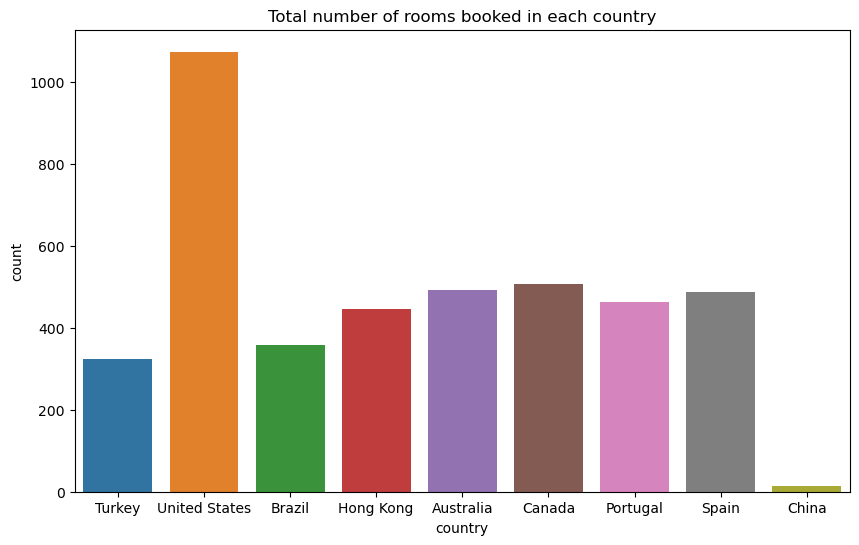

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="country")
plt.title("Total number of rooms booked in each country")

Text(0.5, 1.0, 'Number of rooms booked in each category across countries')

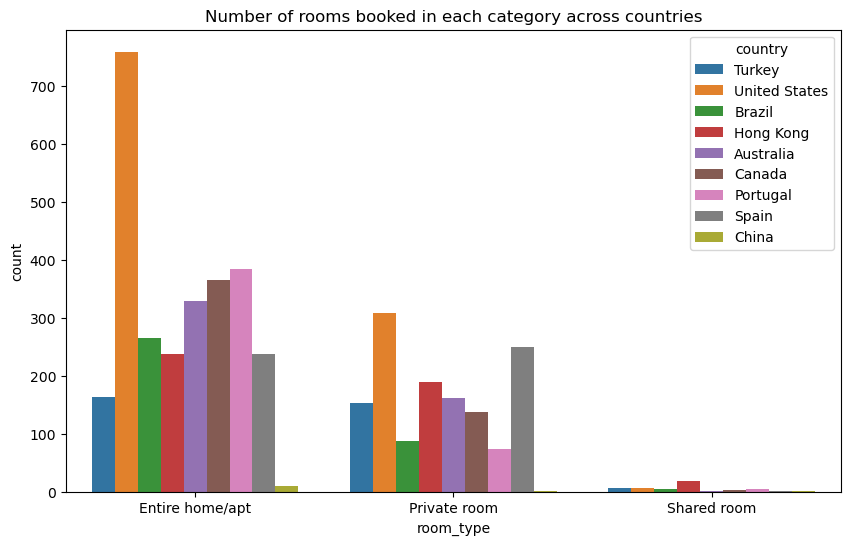

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="room_type", hue="country")
plt.title("Number of rooms booked in each category across countries")

In [20]:
countries = data['country'].unique()

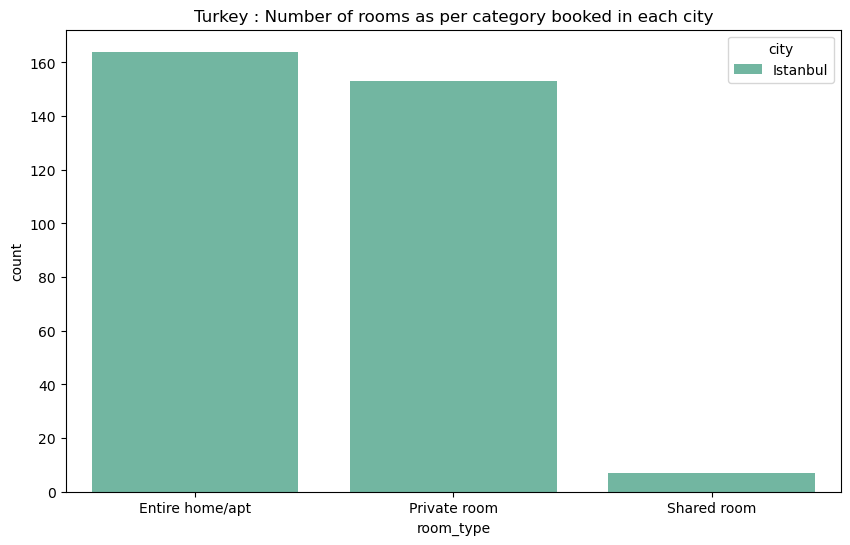

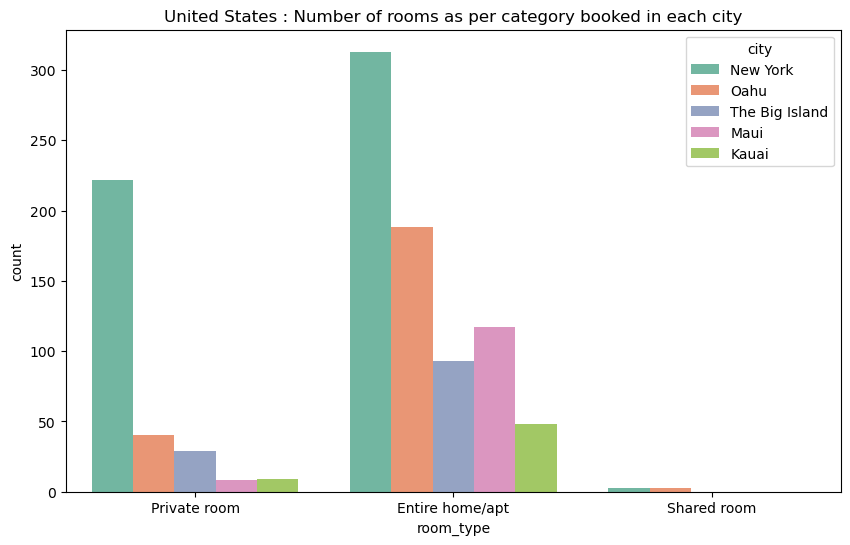

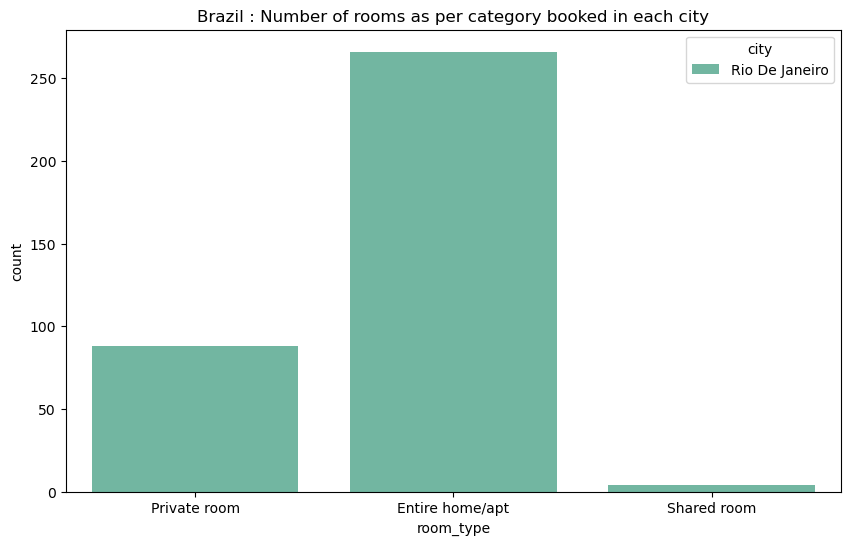

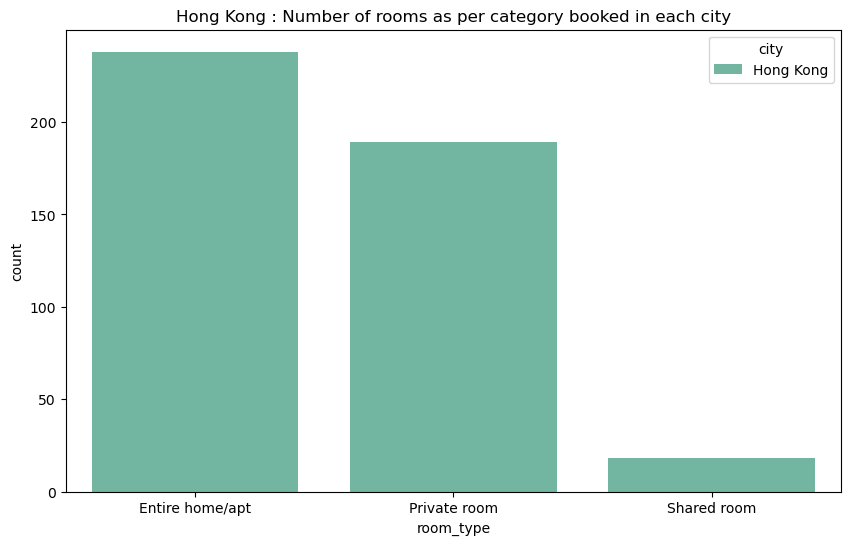

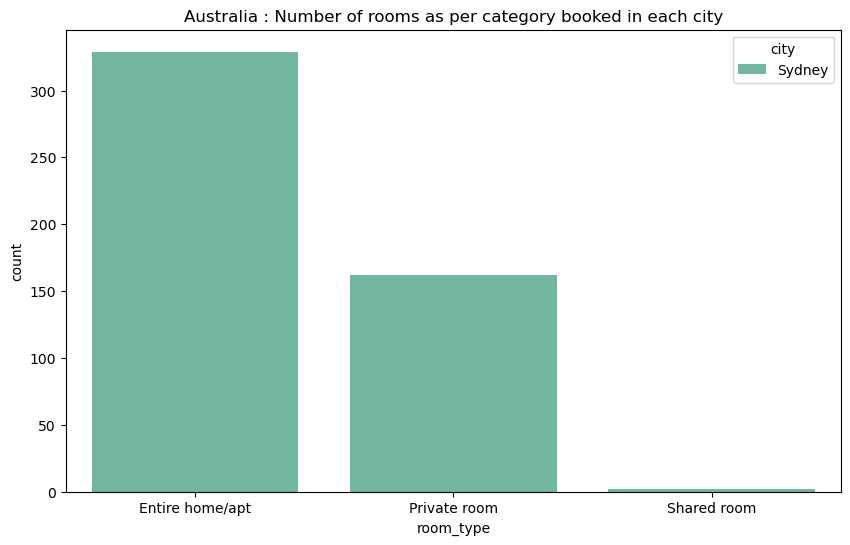

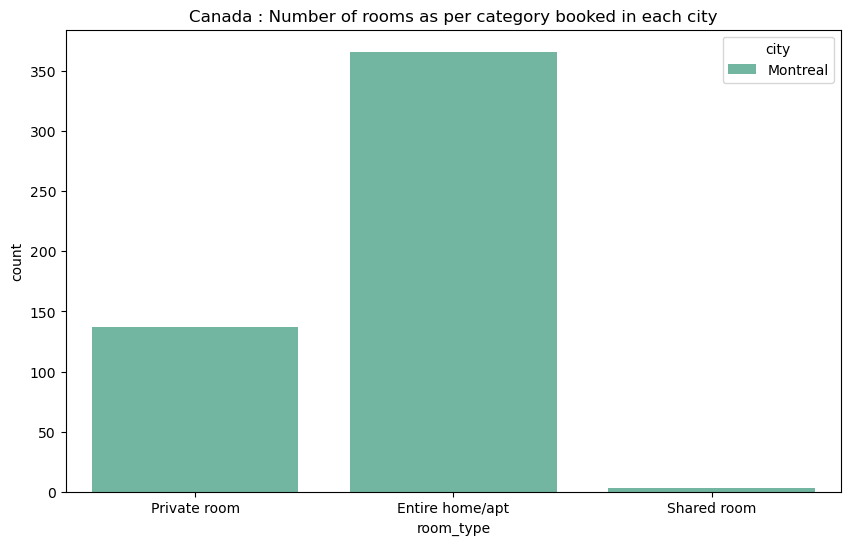

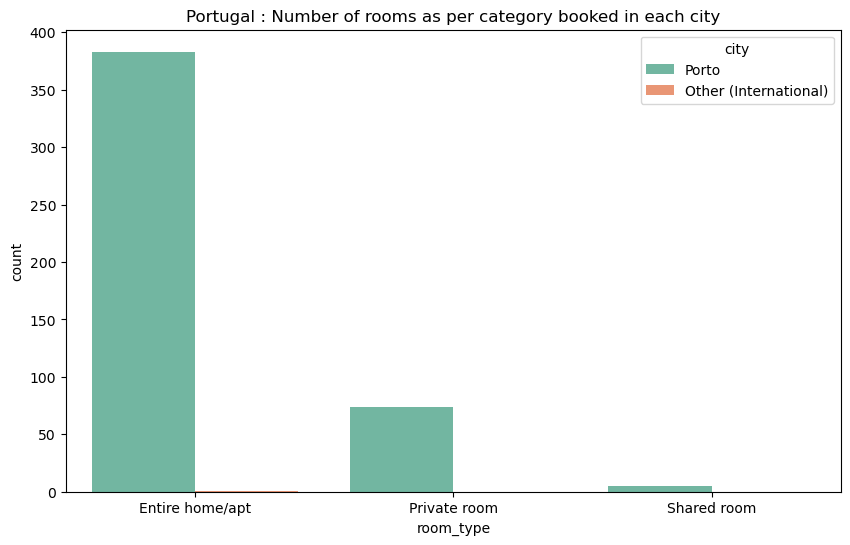

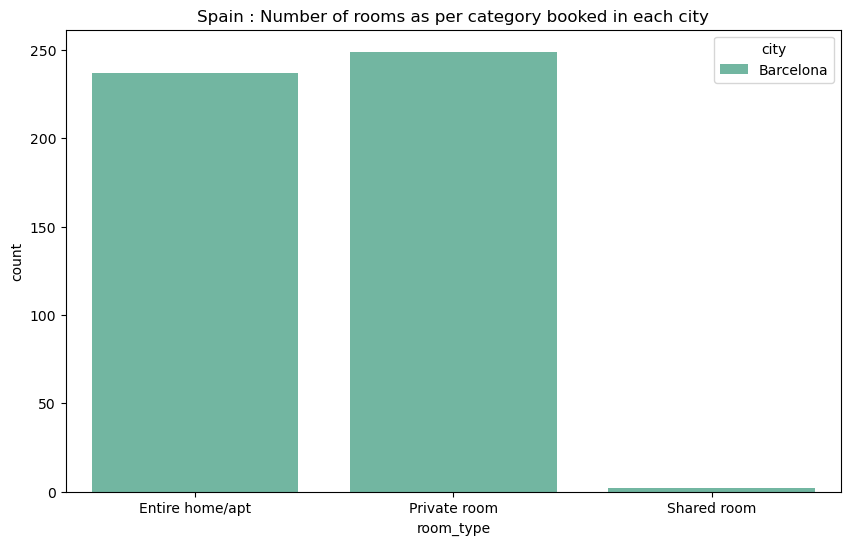

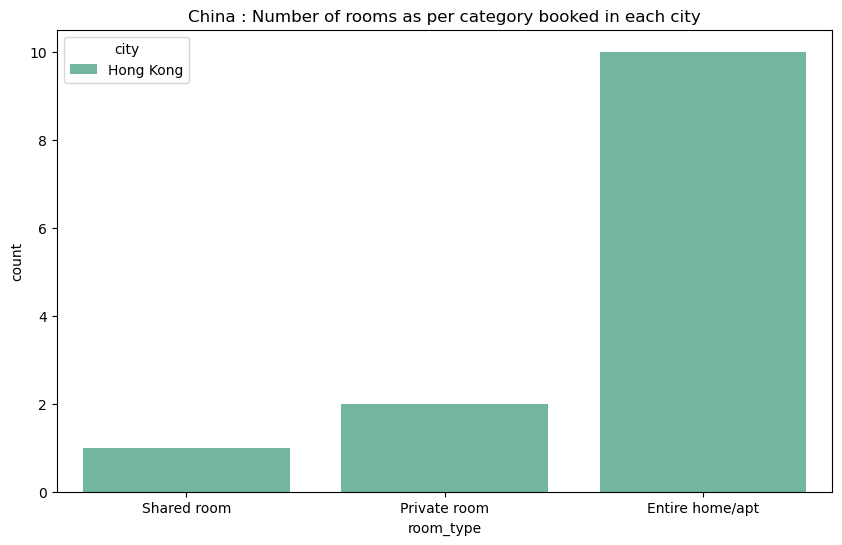

In [21]:
for country in countries:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data.query(f'country == "{country}"'), x="room_type", hue="city", palette="Set2")
    plt.title(f"{country} : Number of rooms as per category booked in each city")

Text(0.5, 1.0, 'Price range across countries')

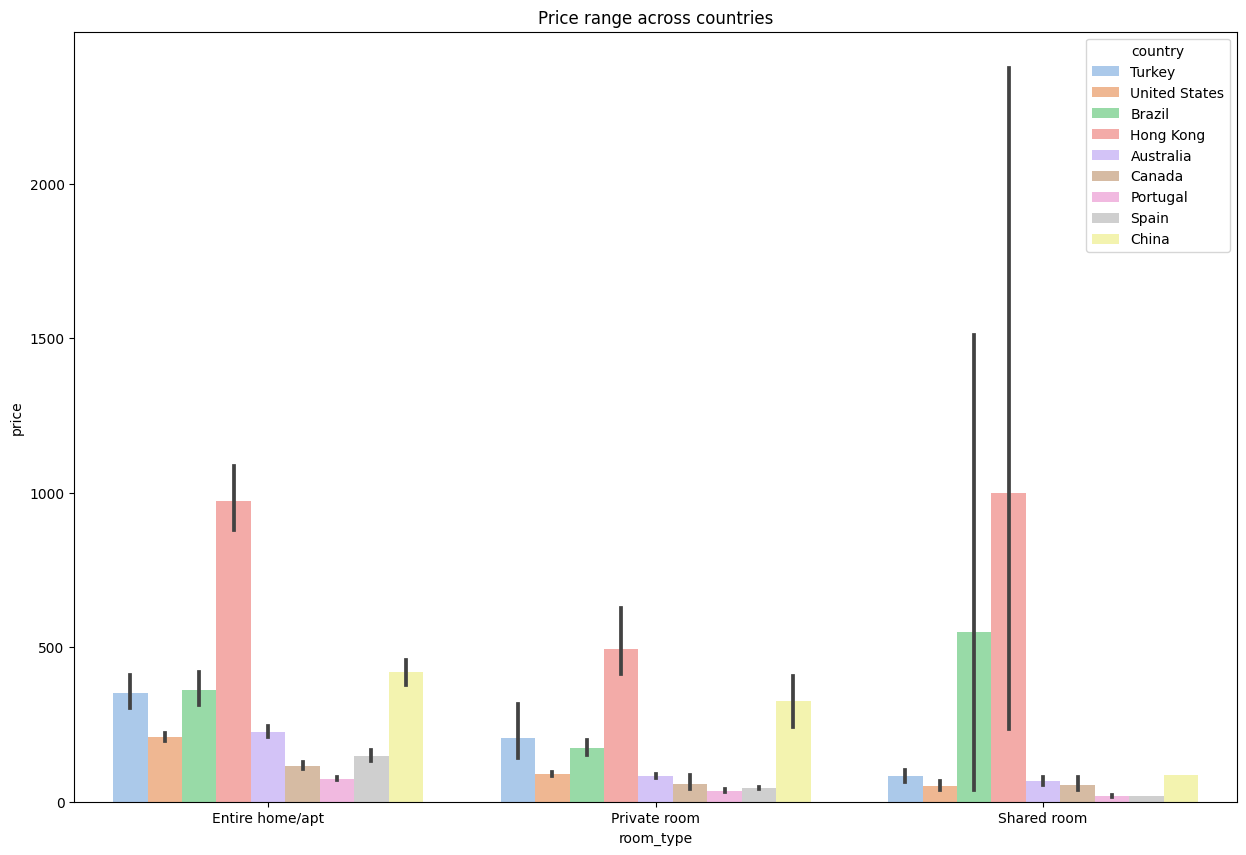

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x="room_type", y="price",hue="country", palette="pastel")
plt.title("Price range across countries")

In [22]:
countries = data['country'].unique()

Price range in each month across cities-country wise(Month is represented by 1,2,3..)


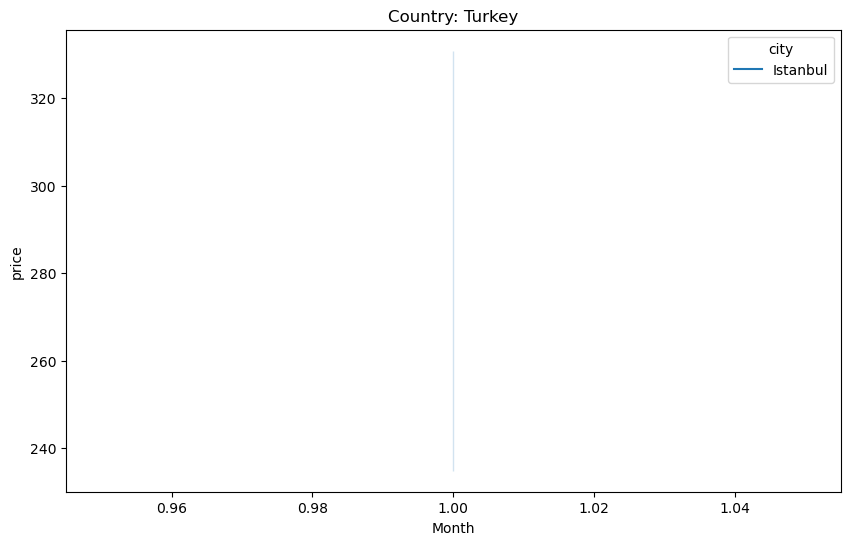

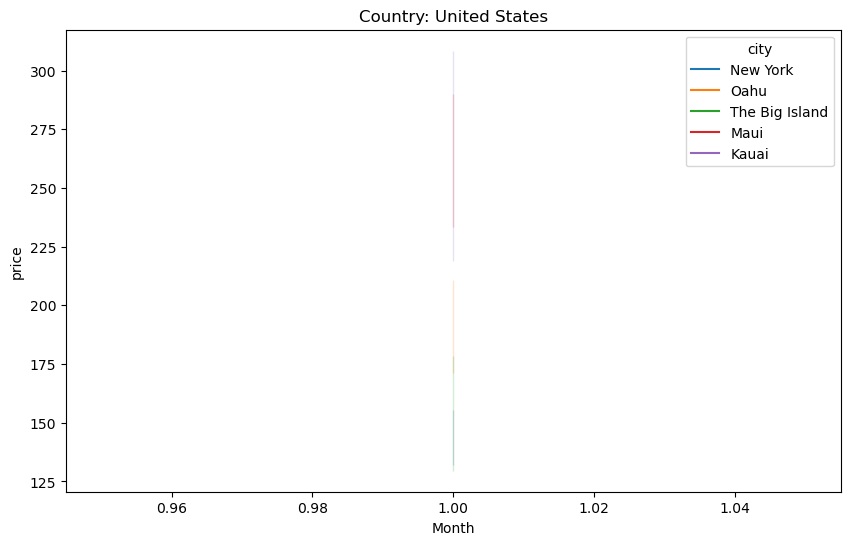

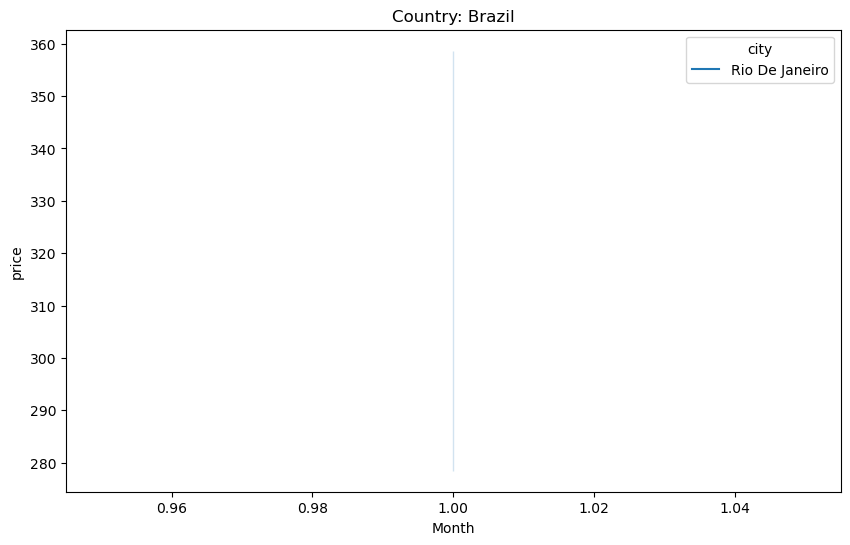

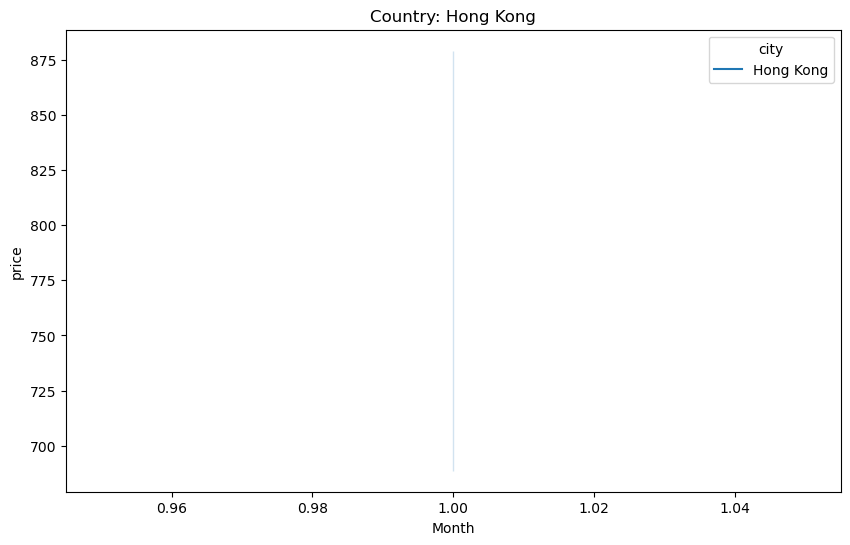

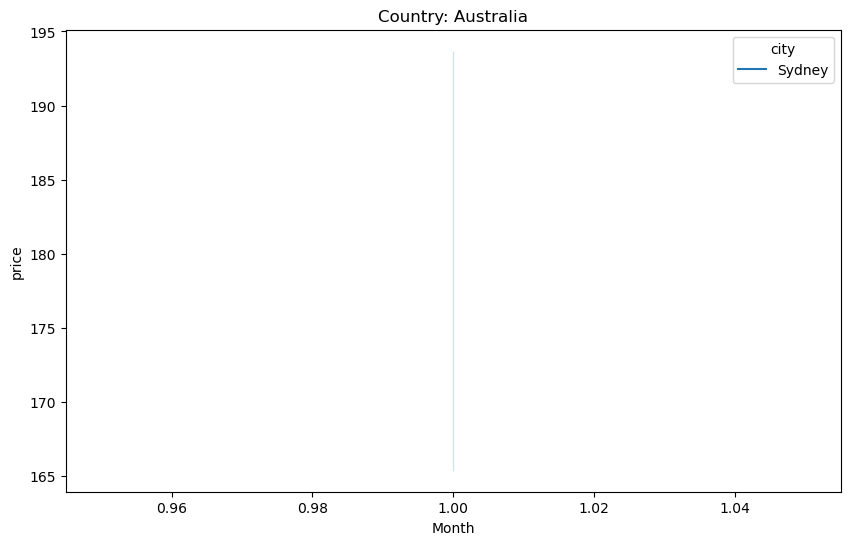

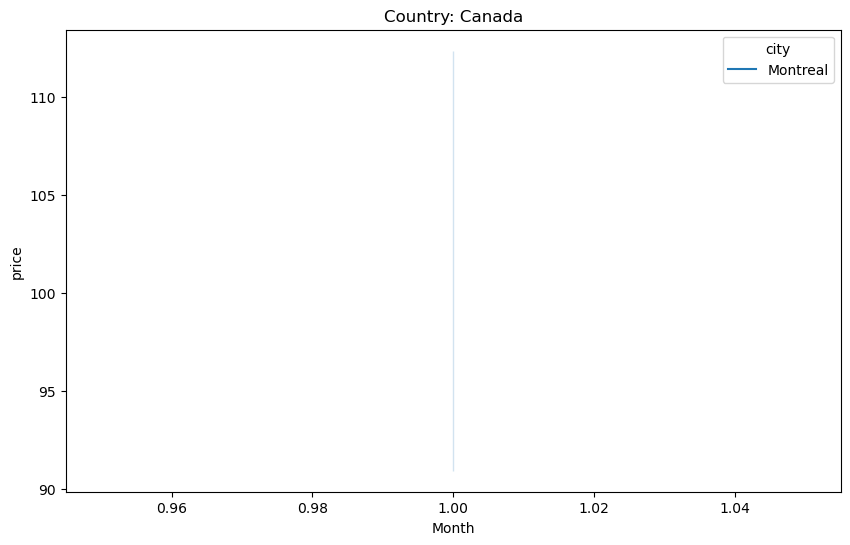

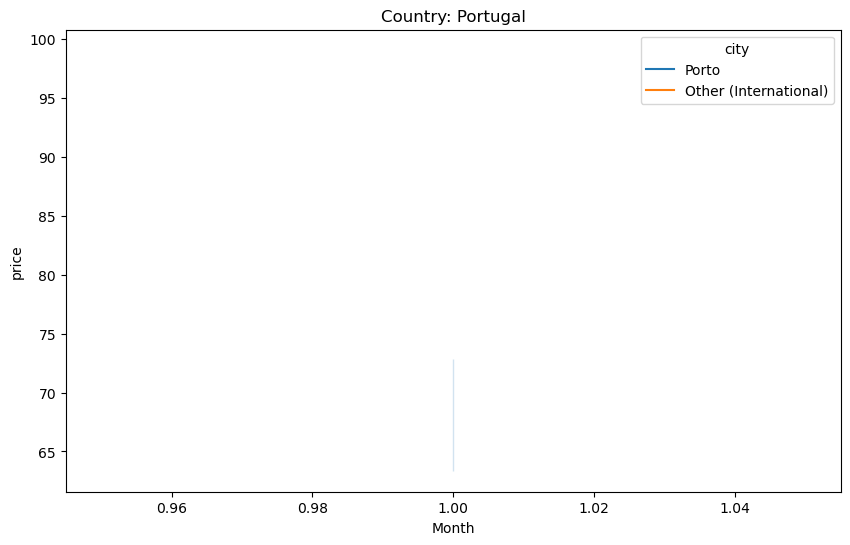

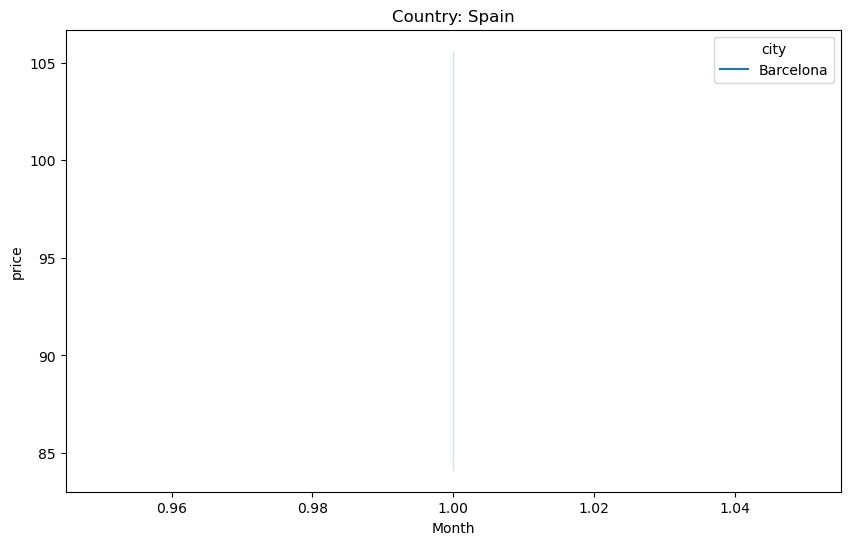

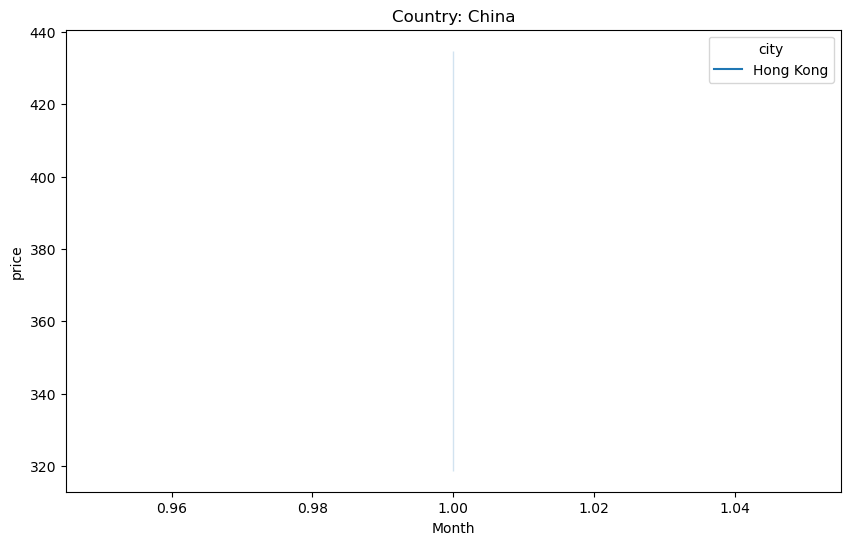

In [24]:
print("Price range in each month across cities-country wise(Month is represented by 1,2,3..)")
for country in countries:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=data.query(f'country == "{country}"'),x="review_date", y="price", hue="city")
    plt.title(f"Country: {country}")
    plt.xlabel("Month")
    plt.show()

Most reviewed and rated hosts in each city across countries


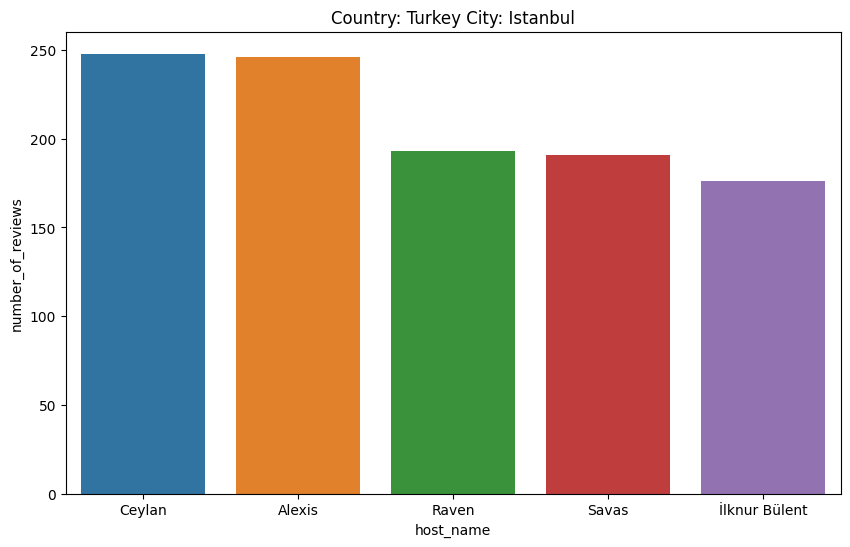

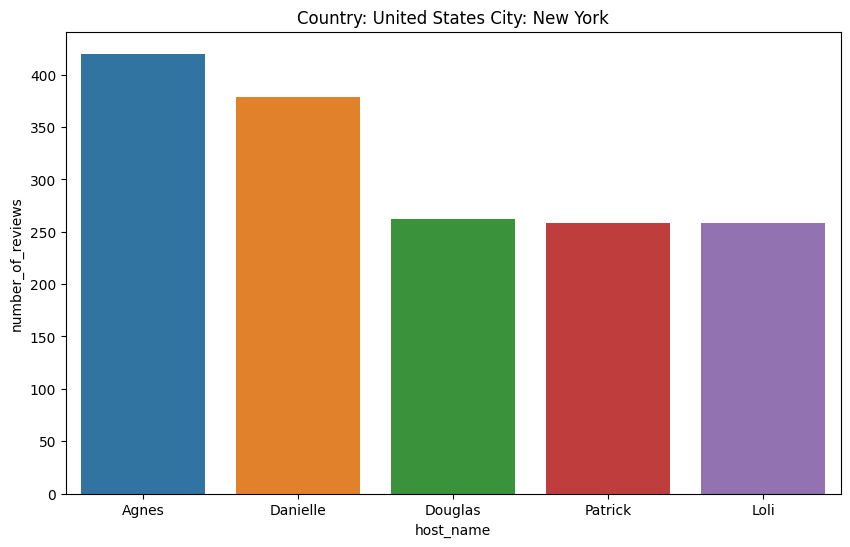

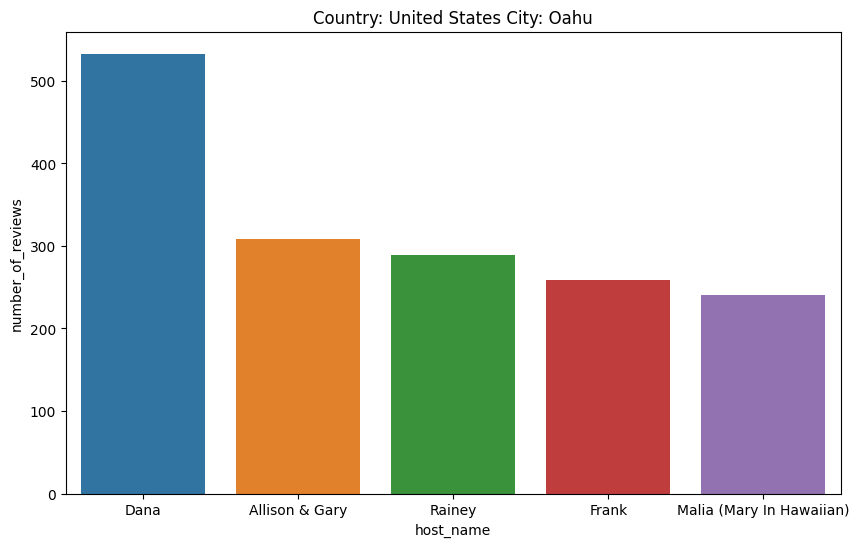

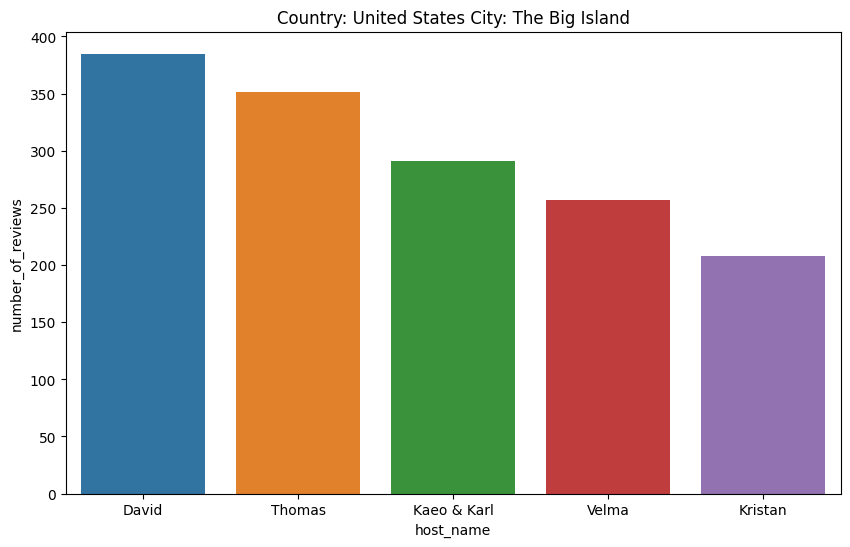

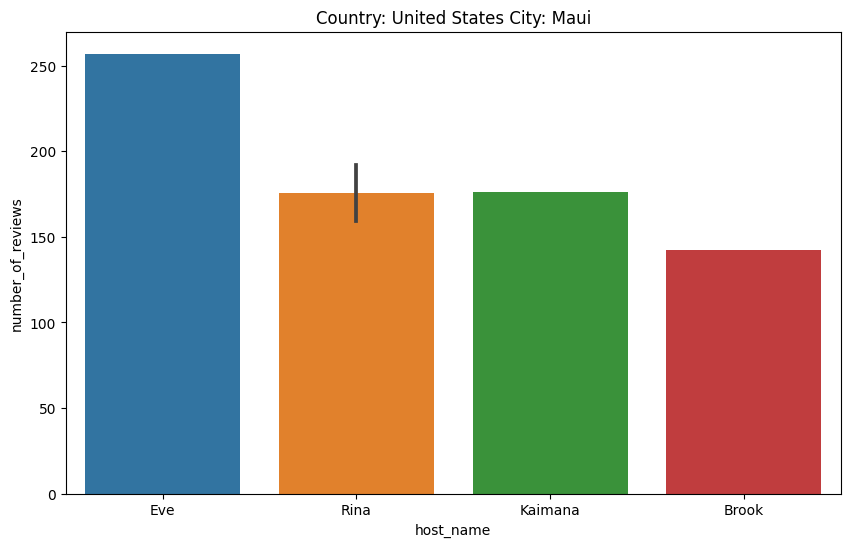

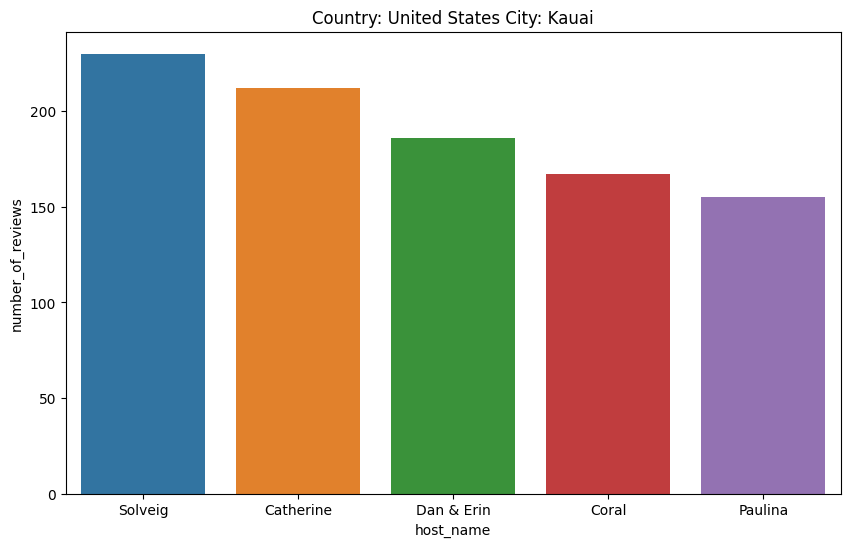

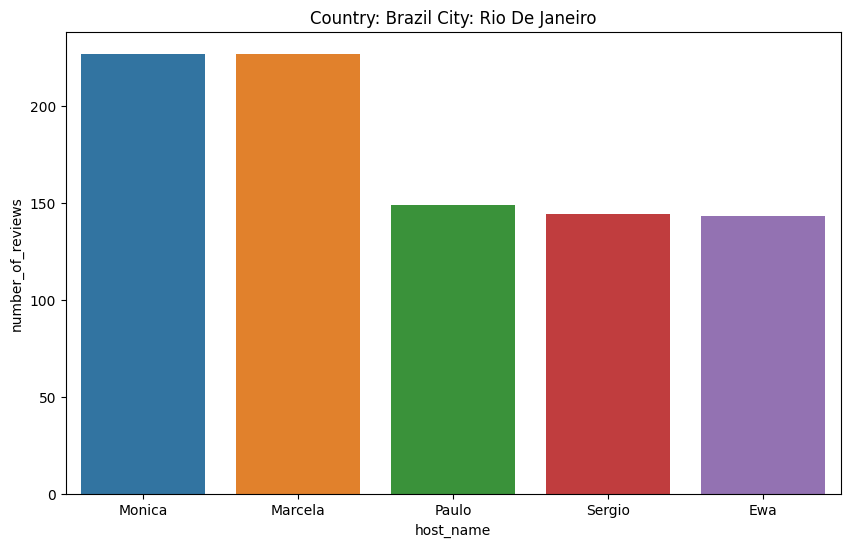

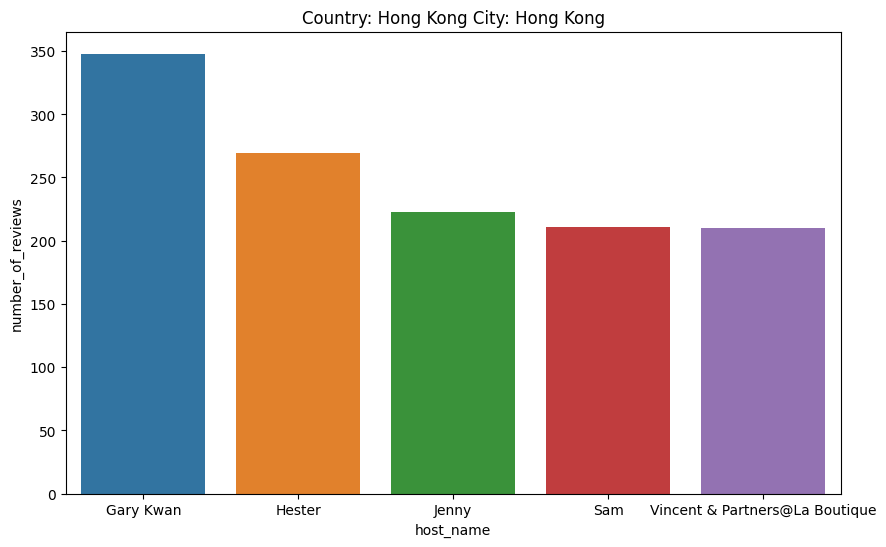

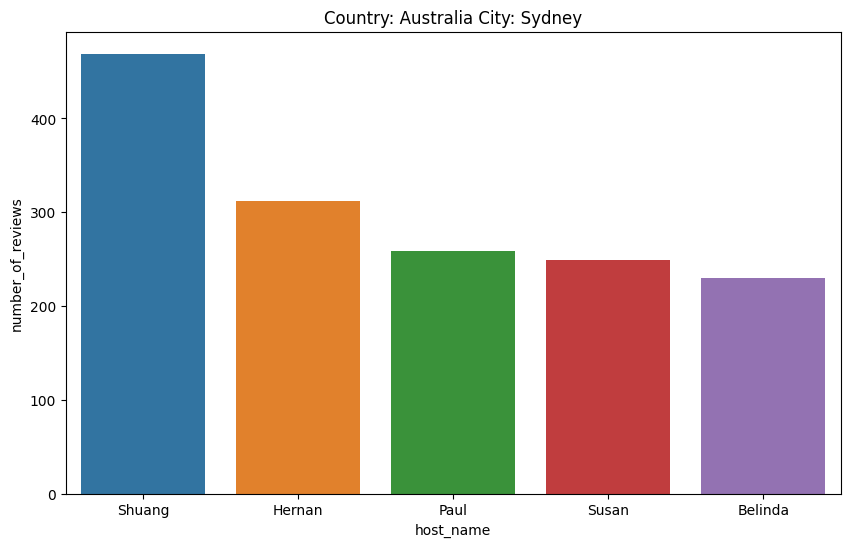

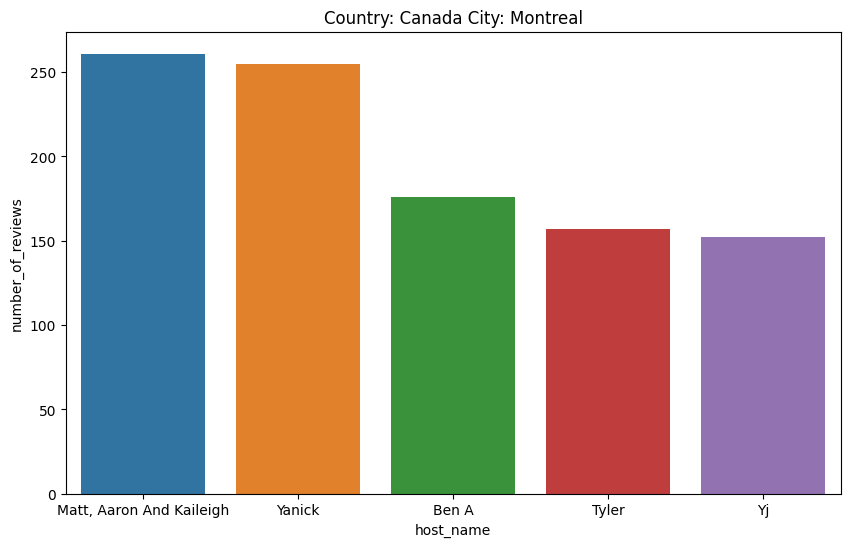

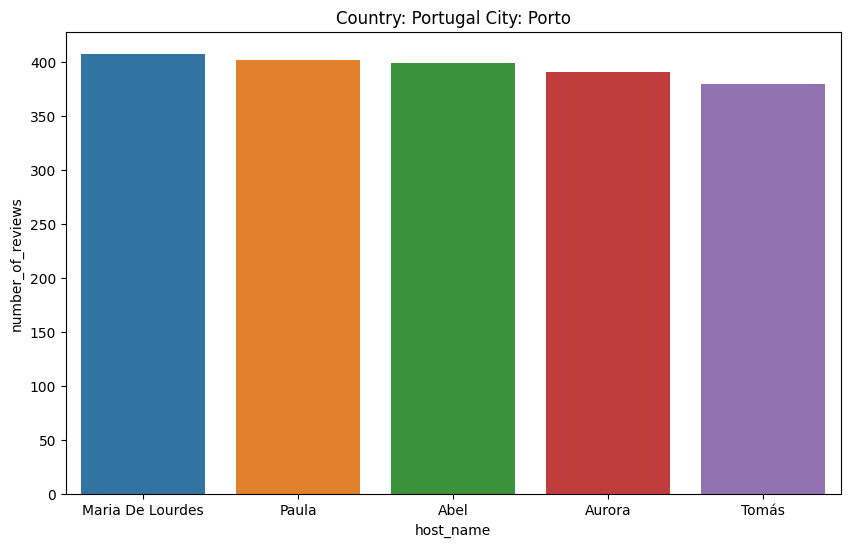

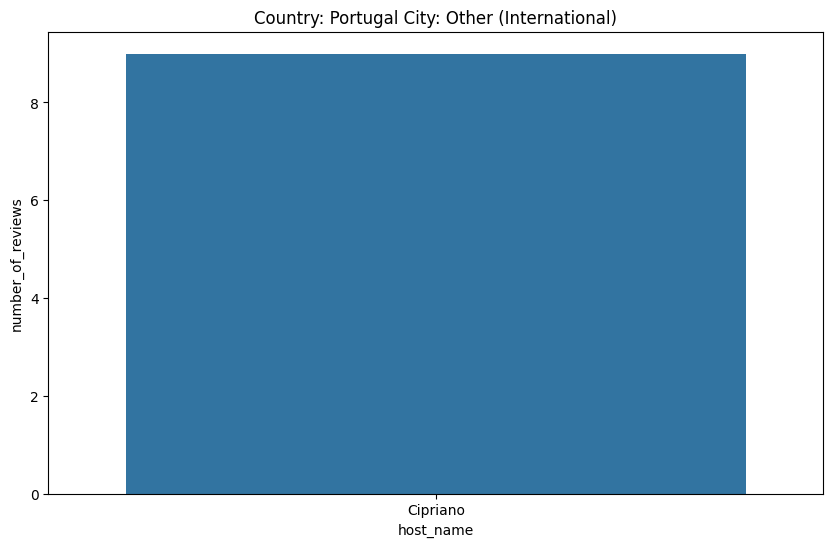

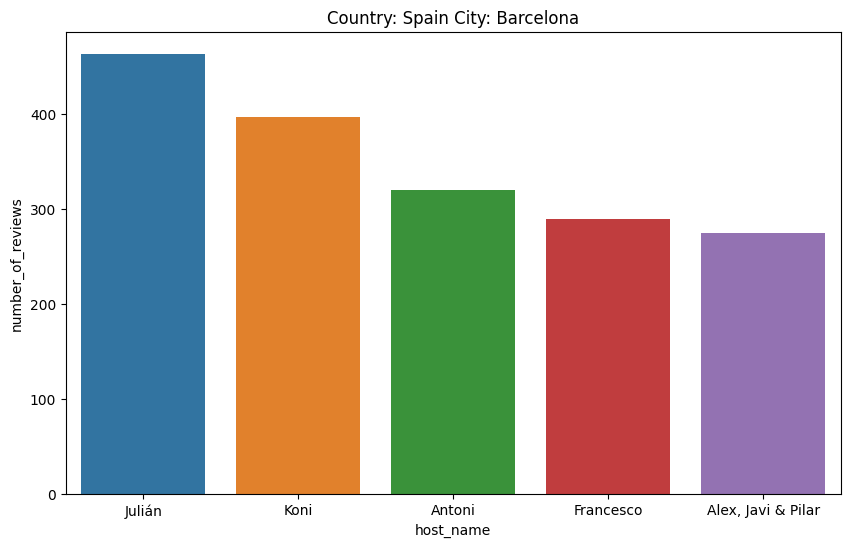

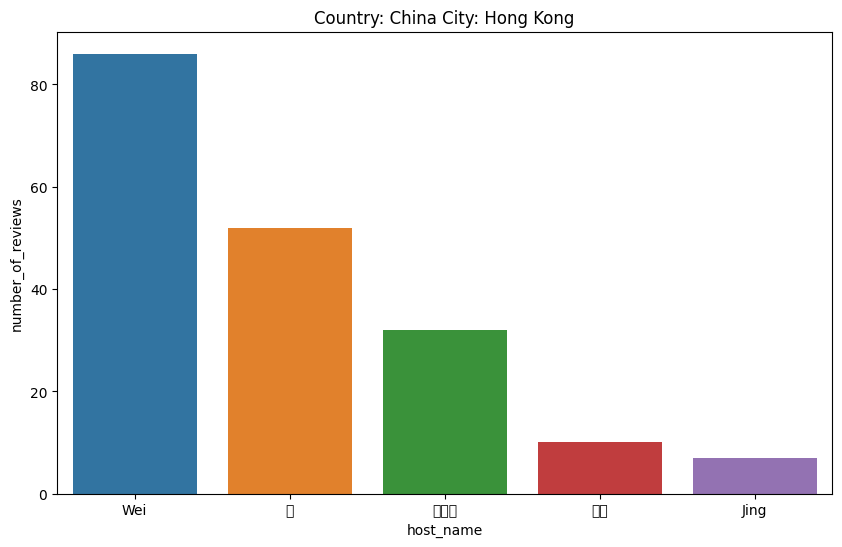

In [25]:
#most reviewed and rated hosts means that the place is good and people are visiting frequently
print("Most reviewed and rated hosts in each city across countries")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0').sort_values(by=['number_of_reviews'], ascending=False)        
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="host_name", y="number_of_reviews")
        plt.title(f"Country: {country} City: {city}")
        plt.show()

Availability of each hosts in cities across countries-month wise
These hosts are most reviewed and rated as well


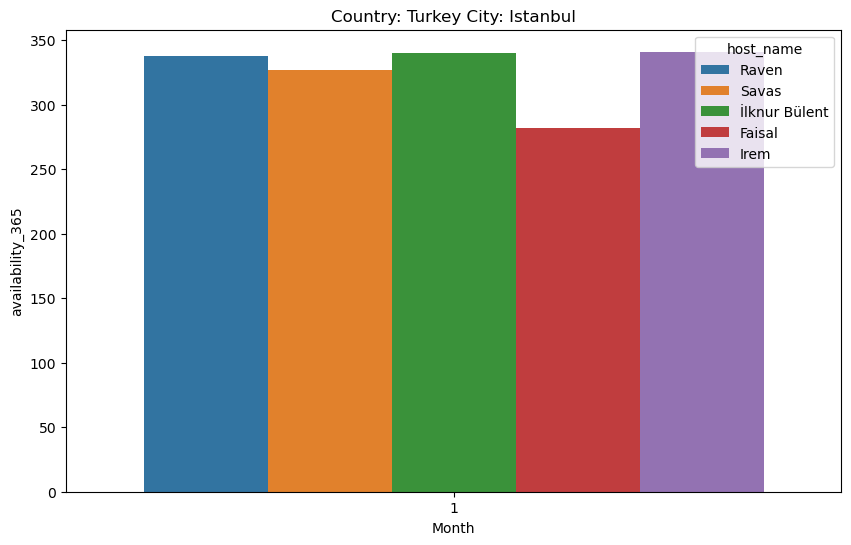

These hosts are most reviewed and rated as well


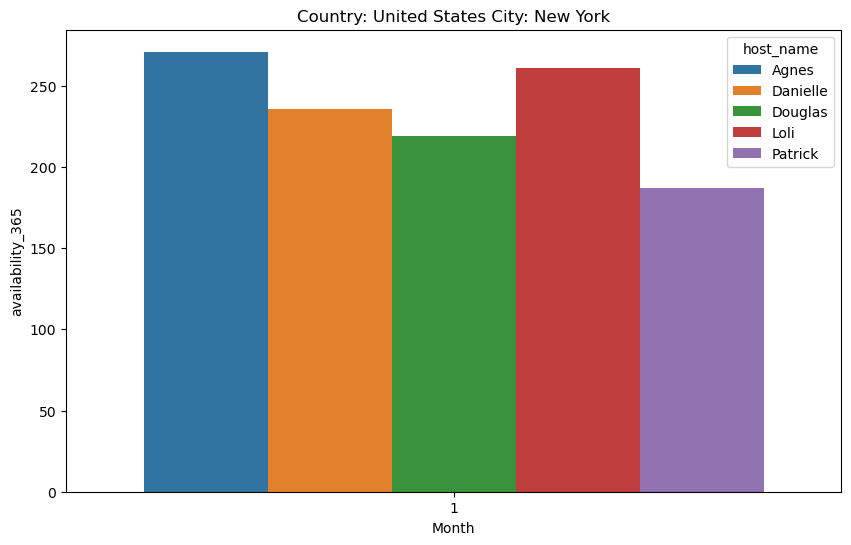

These hosts are most reviewed and rated as well


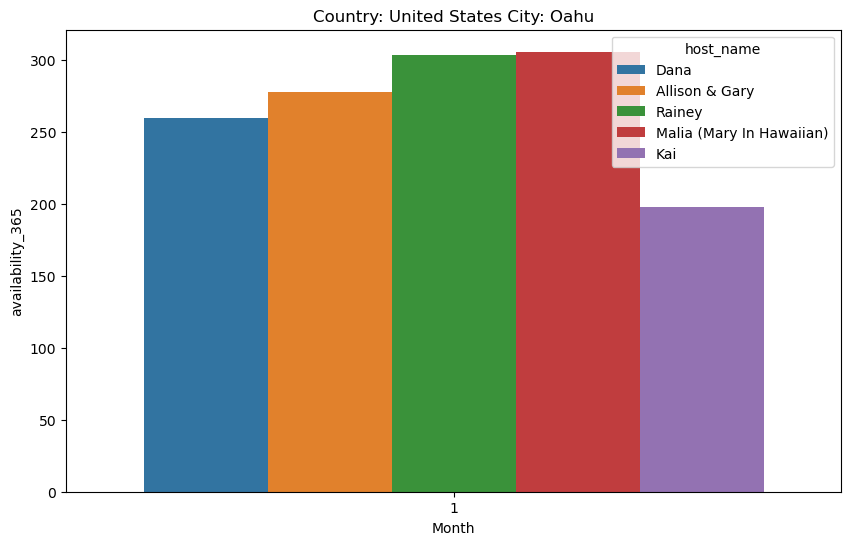

These hosts are most reviewed and rated as well


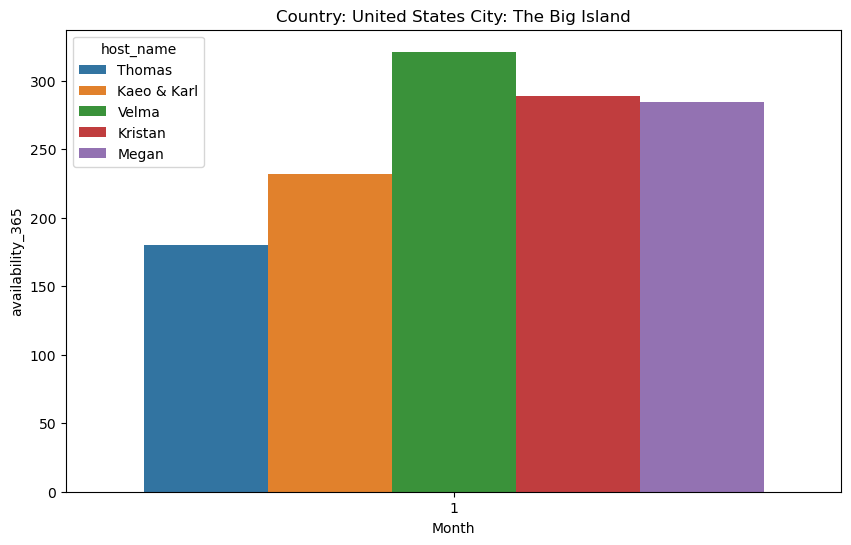

These hosts are most reviewed and rated as well


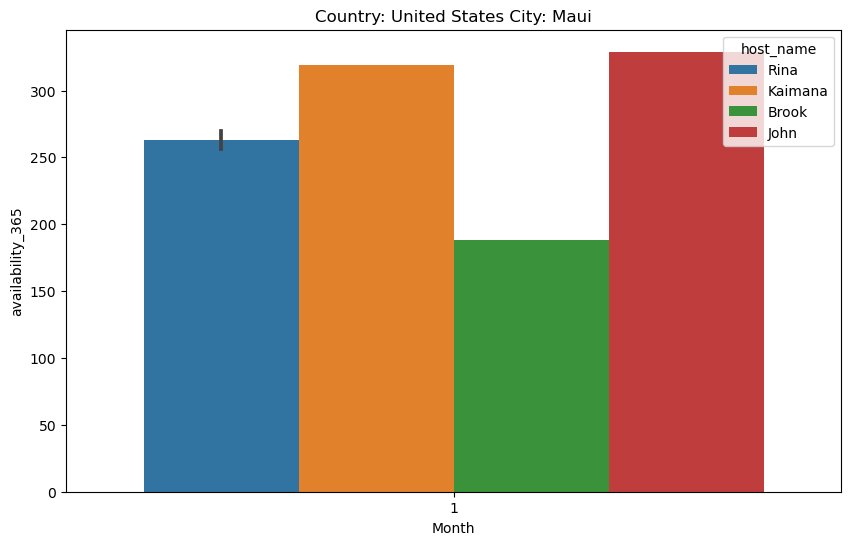

These hosts are most reviewed and rated as well


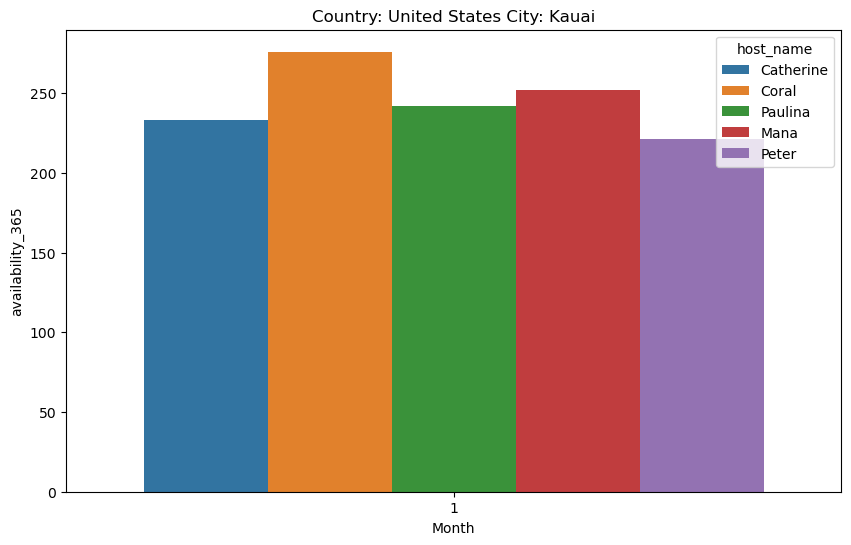

These hosts are most reviewed and rated as well


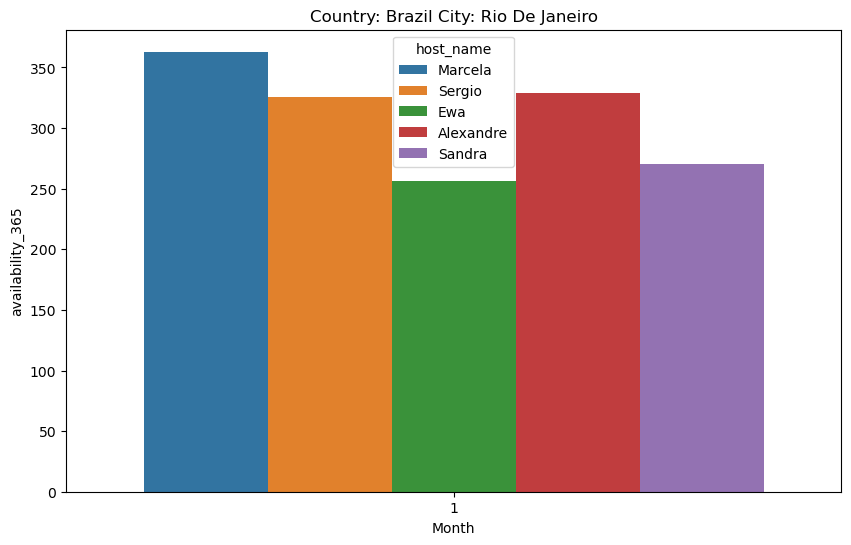

These hosts are most reviewed and rated as well


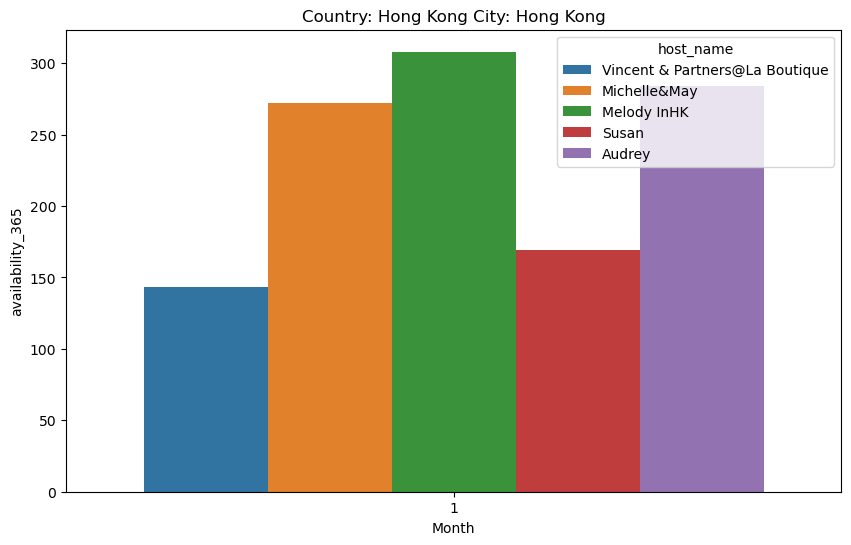

These hosts are most reviewed and rated as well


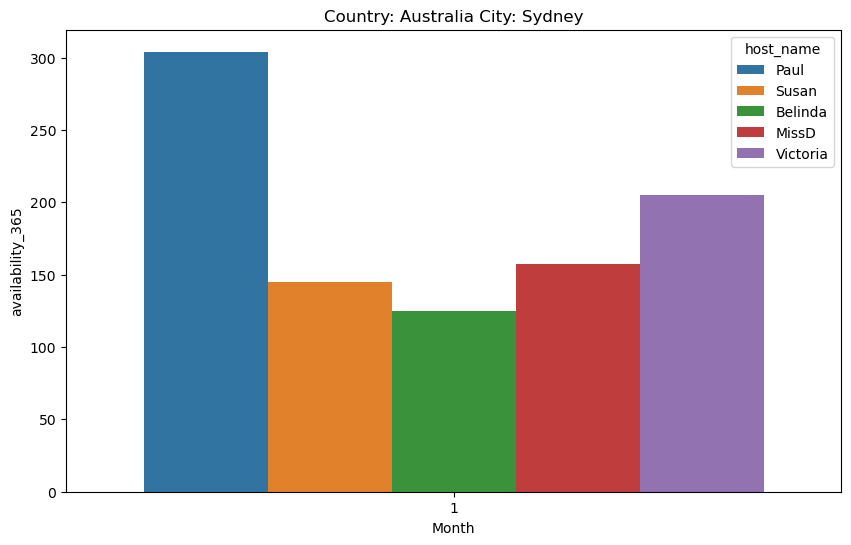

These hosts are most reviewed and rated as well


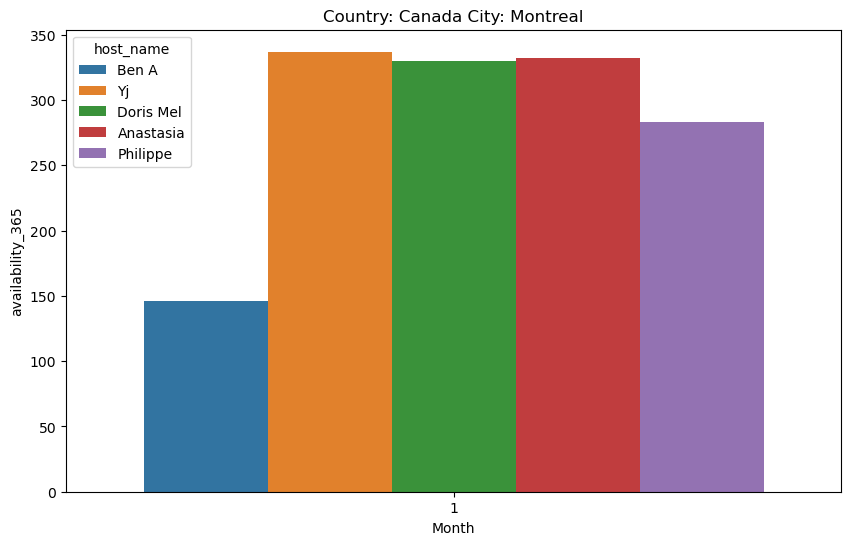

These hosts are most reviewed and rated as well


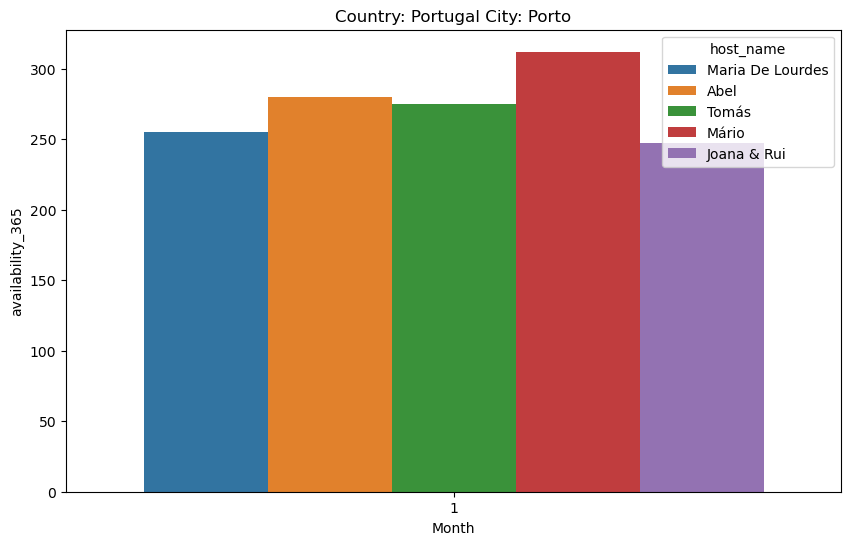

These hosts are most reviewed and rated as well


ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [25]:
print("Availability of each hosts in cities across countries-month wise")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0 & availability_365 >= availability_365.mean()').sort_values(by=['number_of_reviews'], ascending=False)        
        print("These hosts are most reviewed and rated as well")
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="review_date", y="availability_365", hue="host_name")
        plt.title(f"Country: {country} City: {city}")
        plt.xlabel("Month")
        plt.show()

Hosts which are in demand in cities across countries-month wise
These hosts are most reviewed and rated as well


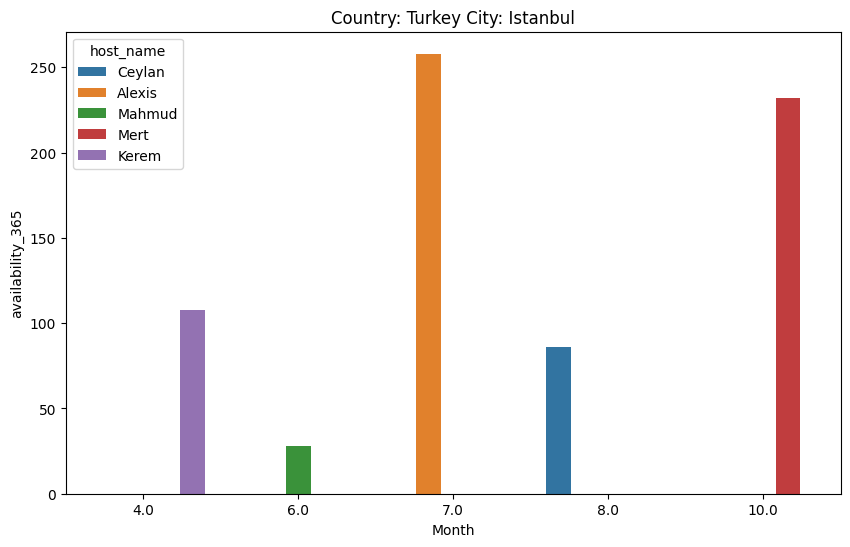

These hosts are most reviewed and rated as well


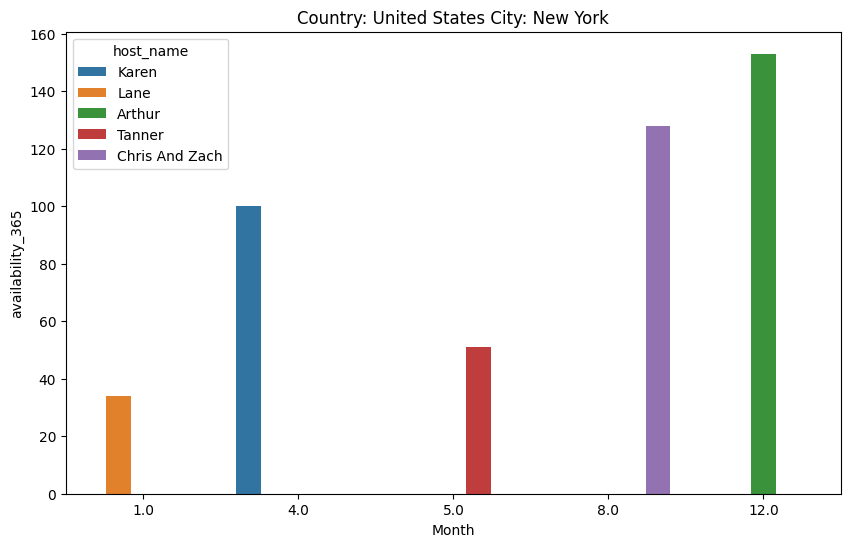

These hosts are most reviewed and rated as well


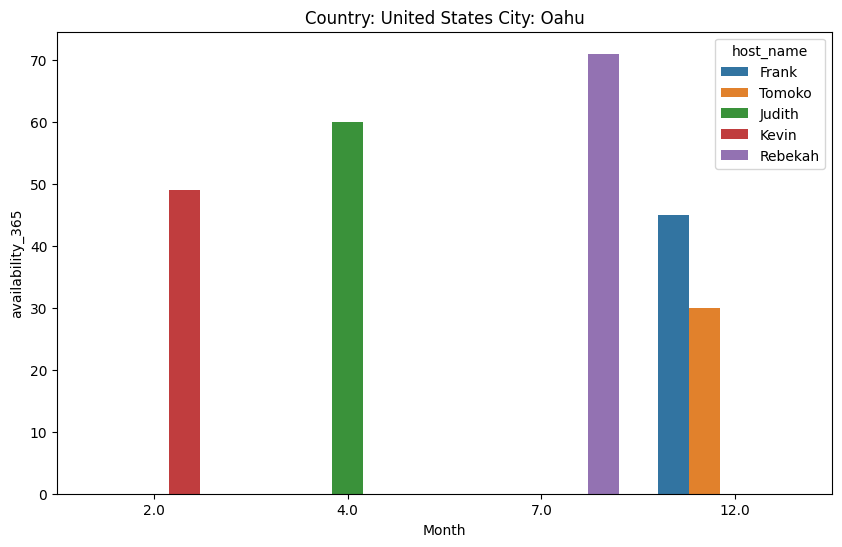

These hosts are most reviewed and rated as well


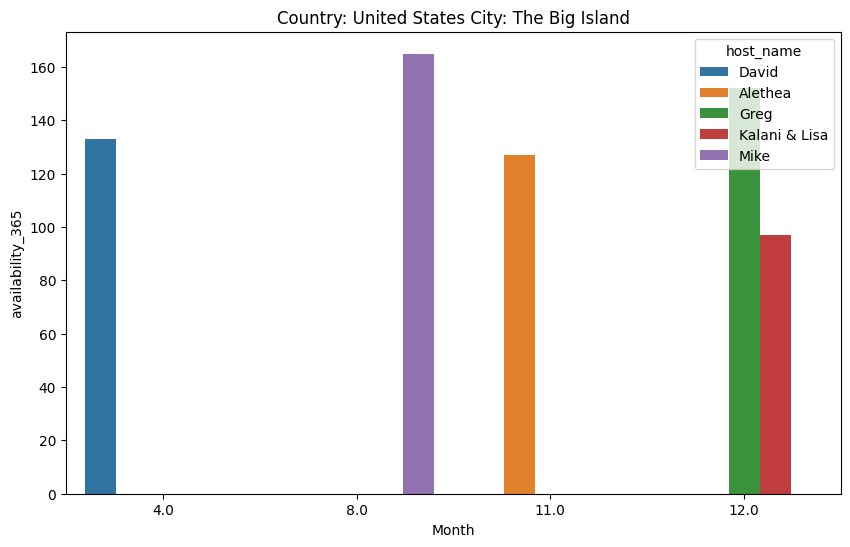

These hosts are most reviewed and rated as well


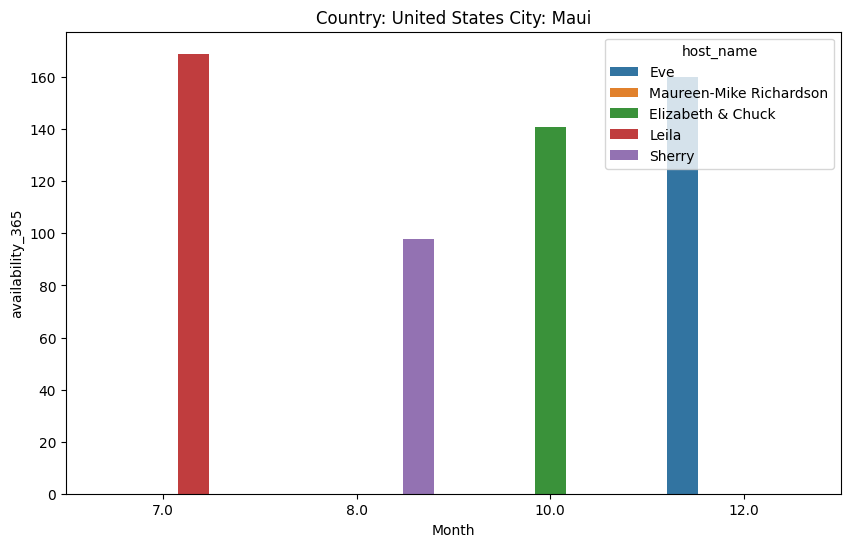

These hosts are most reviewed and rated as well


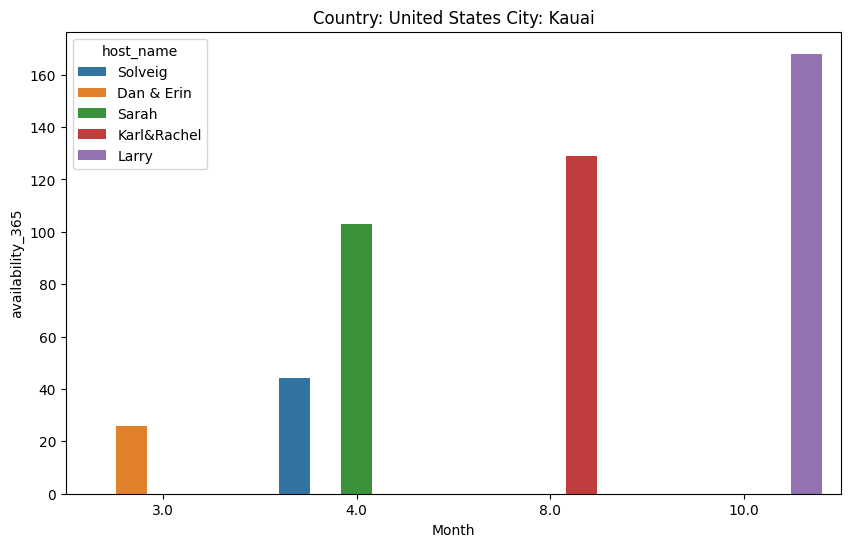

These hosts are most reviewed and rated as well


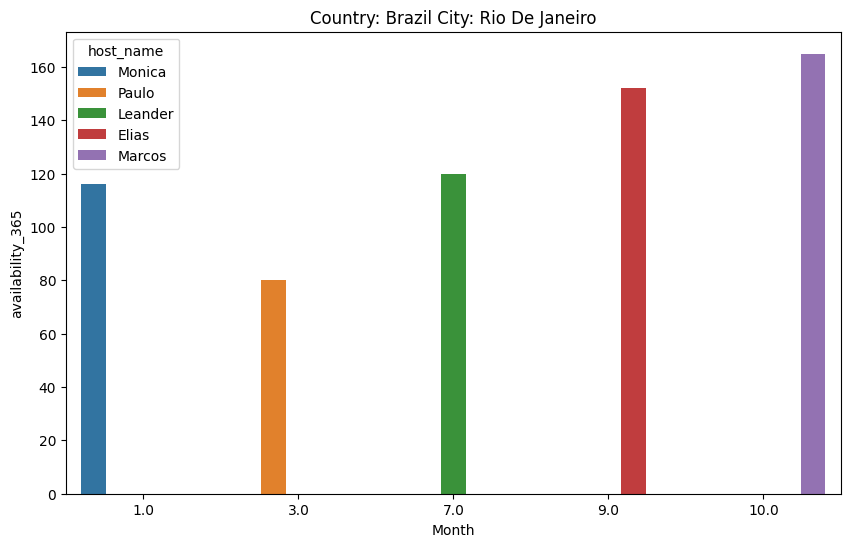

These hosts are most reviewed and rated as well


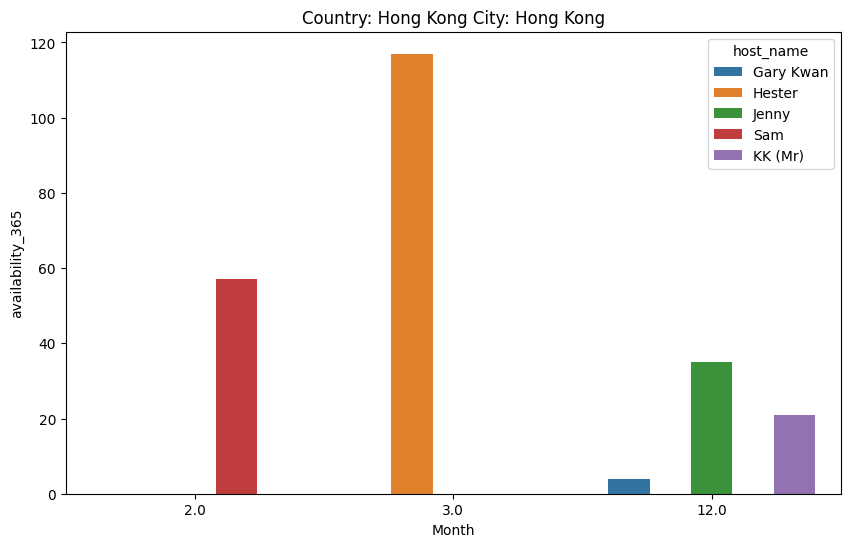

These hosts are most reviewed and rated as well


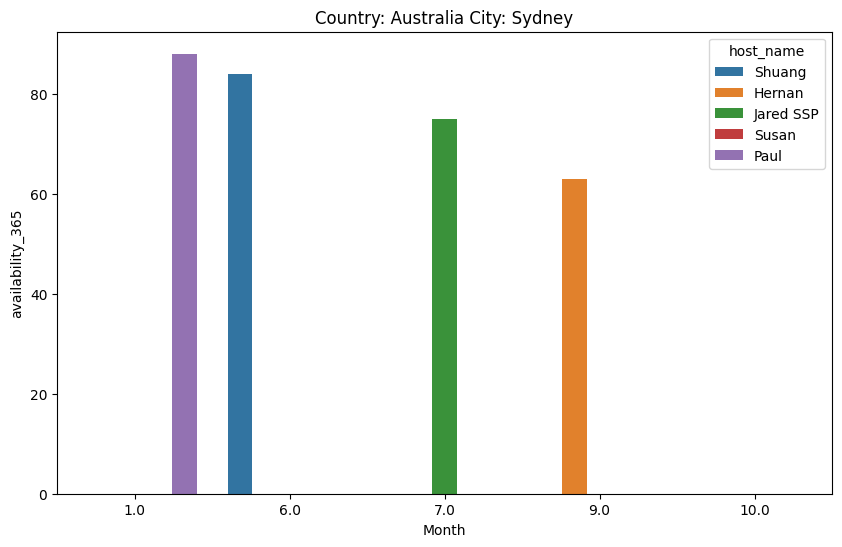

These hosts are most reviewed and rated as well


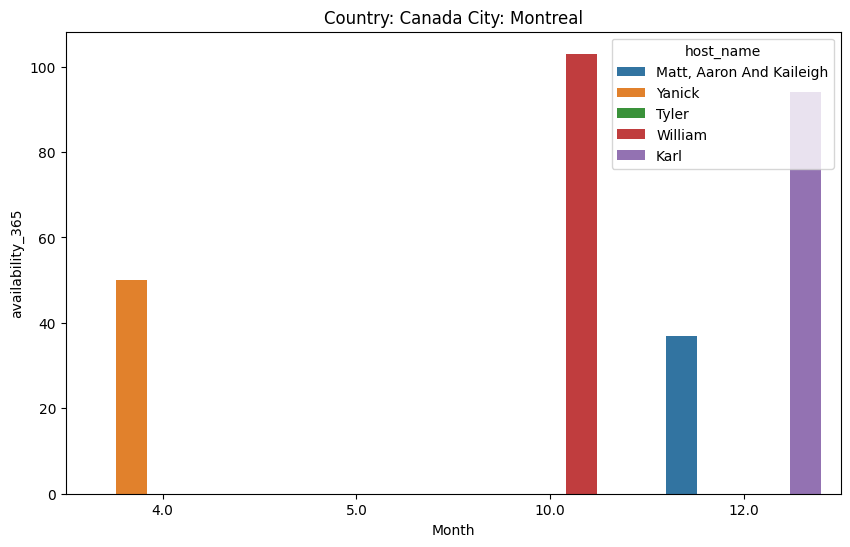

These hosts are most reviewed and rated as well


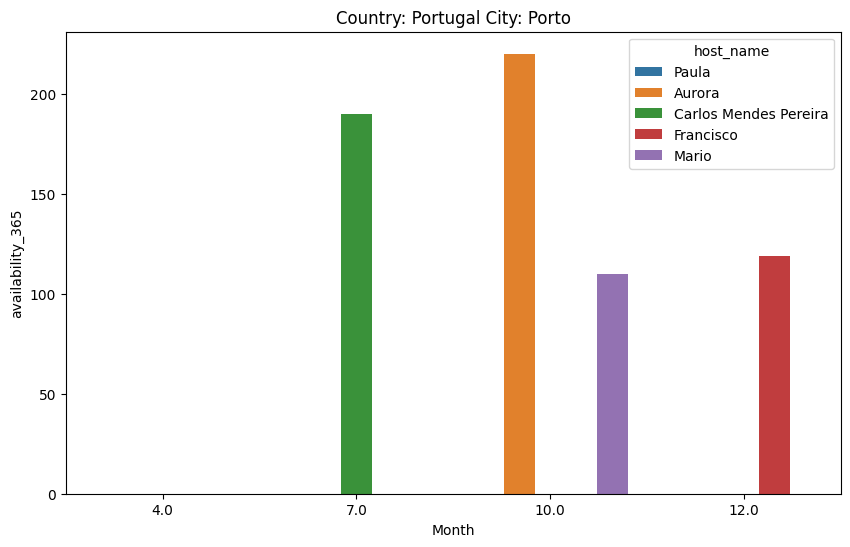

These hosts are most reviewed and rated as well


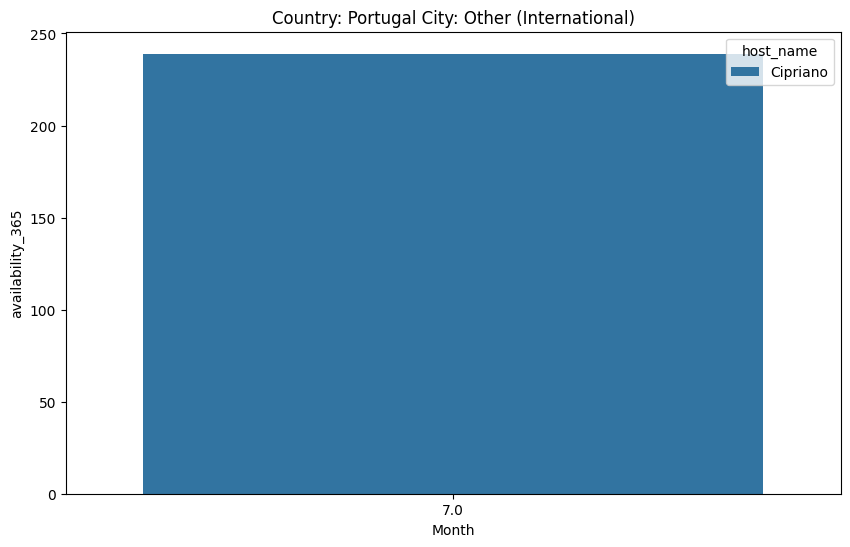

These hosts are most reviewed and rated as well


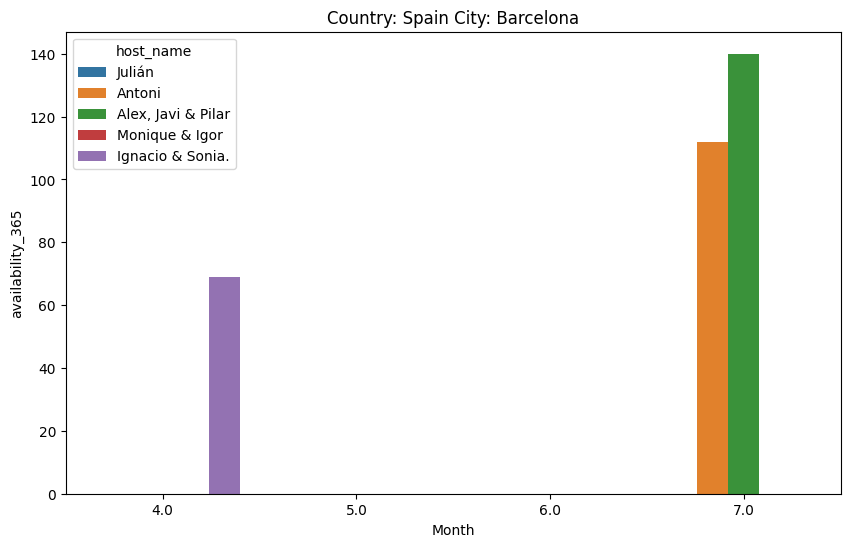

These hosts are most reviewed and rated as well


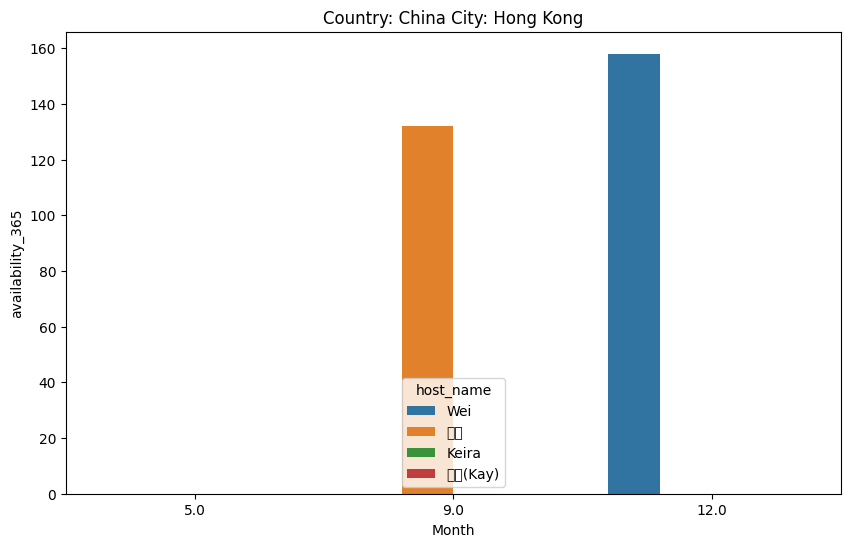

In [27]:
print("Hosts which are in demand in cities across countries-month wise")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0 & availability_365 < availability_365.mean()').sort_values(by=['number_of_reviews'], ascending=False)        
        print("These hosts are most reviewed and rated as well")
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="review_date", y="availability_365", hue="host_name")
        plt.title(f"Country: {country} City: {city}")
        plt.xlabel("Month")
        plt.show()

In [ ]:
#import folium

In [ ]:
#data.head(10)

In [ ]:
#data.insert(0,'lat'," ")

In [ ]:
#data.insert(1,'lon'," ")

In [ ]:
#data.reset_index(drop=True, inplace=True)

In [ ]:
#for i in range(len(data)):
   # data['lat'][i], data['lon'][i] = data['coordinates'][i].strip('[]').split(',')

In [ ]:
# data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
# data['lon'] = pd.to_numeric(data['lon'], errors='coerce')

In [ ]:
# data.to_csv("airbnb.csv")

In [ ]:
#df2 = data.query('country == "China"')

In [ ]:
# map = folium.Map(df2[['lat','lon']].mean().values.tolist(), zoom_start=15, tiles="cartodb positron")
# for lat, lon, host in zip(df2['lat'], df2['lon'], df2['host_name']):
#     folium.Marker([lat, lon], popup=host).add_to(map)

# sw = df2[['lat', 'lon']].min().values.tolist()
# ne = df2[['lat', 'lon']].max().values.tolist()

# map.fit_bounds([sw, ne]) 
# map